# Numpy Vectors

In [2]:
import numpy as np

c = np.array([True, False, True], dtype=bool)
print('Bool vector: ', c)

print('Type of bool vector: ', c.dtype)

Bool vector:  [ True False  True]
Type of bool vector:  bool


In [3]:
# another way to create a numpy vector

d = np.arange(start=0, stop=10, step=2, dtype=float)
print('Vector from 0 to 10 in increments of 2: ', d)

Vector from 0 to 10 in increments of 2:  [0. 2. 4. 6. 8.]


## The dimensions of a matrix and .shape

In [5]:
# a simple row vercor has ndim=1 
print(c.ndim)

#  a simple col vercor has ndim=2
e = np.random.rand(3, 1)
print(e.ndim)

# a matrix has ndim=2
mtrx = np.random.rand(3, 3)
print(mtrx.ndim)

1
2
2


In [5]:
# shape is amount of rows and columns

print(mtrx.shape)
print(c.shape)
print(e.shape)

(3, 3)
(3,)
(3, 1)


## Vector operations

In [7]:
a = np.array([1, 2, 3])
b = np.array([6, 5, 4])
k = 2

print('Vektor a:', a)
print('Vektor b:', b)
print('Number k:', k)

Vektor a: [1 2 3]
Vektor b: [6 5 4]
Number k: 2


In [8]:
print('Sum of a and b:\n', a + b)
print('Subtraction  of a and b:\n', a - b)
print('Coordinate multiplication a and b:\n', a * b )
print('Multiplying a vector by a number k:\n', k * a)

Sum of a and b:
 [7 7 7]
Subtraction  of a and b:
 [-5 -3 -1]
Coordinate multiplication a and b:
 [ 6 10 12]
Multiplying a vector by a number k:
 [2 4 6]


## Norm
#### Norm - generalization of the concept "length" of a vector

In [10]:
from numpy.linalg import norm

a = np.array([1, 2, -3])
print('Vector a:', a)

Vector a: [ 1  2 -3]


In [11]:
print('L1 (manhattan) norm of а vector:\n', norm(a, ord=1))

L1 (manhattan) norm а:
 6.0


In [12]:
print('L2 (euclidean) norm of а vector:\n', norm(a, ord=2))

L2 (euclidean) norm of а vector:
 3.7416573867739413


## Distances (Metrics)
#### Metric is generalization of the concept "distance"

In [15]:
a = np.array([1, 2, -3])
b = np.array([-4, 3, 8])
print('Vector a:', a)
print('Vector b:', b)

Вектор a: [ 1  2 -3]
Вектор b: [-4  3  8]


In [13]:
print('L1 (manhattan) distance between the a and b vectors:\n', norm(a - b, ord=1))

L1 (manhattan) distance between the a and b vectors:
 15.0


In [14]:
print('L2 (euclidean) distance between the a and b vectors:\n', norm(a - b, ord=2))

L2 (euclidean) distance between the a and b vectors:
 9.1104335791443


### Reshape and SciPy

Также расстояние между векторами можно посчитать с помощью функции **scipy.spatial.distance.cdist(XA, XB, metric='euclidean', p=2, ...)** из модуля SciPy, предназначенного для выполнения научных и инженерных расчётов.

In [15]:
from scipy.spatial.distance import cdist

a = np.array([6, 3, -5])
b = np.array([-1, 0, 7])
print('Vector a:', a)
print('Its shape:', a.shape)
print('Vector b:', b)
print('Its shape:', b.shape)

Vector a: [ 6  3 -5]
Its shape: (3,)
Vector b: [-1  0  7]
Its shape: (3,)


**scipy.spatial.distance.cdist(...)** требует, чтобы размерность **XA** и **XB** была как минимум двумерная. По этой причине для использования этой функции необходимо преобразовать векторы к вектор-строкам с помощью способов, которые мы рассмотрим ниже.

Параметры **XA**, **XB** — исходные вектор-строки, а **metric*** и **p** задают метрику расстояния (более подробно о том, какие метрики можно использовать, см. документацию).

Первый способ из вектора сделать вектор-строку (вектор-столбец) — это использовать метод **array.reshape(shape)**, где параметр **shape** задает размерность вектора (кортеж чисел).

In [16]:
a = a.reshape((1, 3))
b = b.reshape((1, 3))
print('After reshape:\n')
print('A row vector a:', a)
print('Its shape:', a.shape)
print('A row vector b:', b)
print('Its shape:', b.shape)

After reshape:

A row vector a: [[ 6  3 -5]]
Its shape: (1, 3)
A row vector b: [[-1  0  7]]
Its shape: (1, 3)


In [21]:
print('Манхэттенское расстояние между a и b (через cdist):', 
      cdist(a, b, metric='cityblock'))

Манхэттенское расстояние между a и b (через cdist): [[22.]]


**Такое же преобразование, но без изменения размерности исходного вектора**.

В NumPy к размерностям объектов можно добавлять фиктивные оси с помощью **np.newaxis**

In [24]:
d = np.array([3, 0, 8, 9, -10])
print('Вектор d:', d)
print('Его размерность:', d.shape)

print ('\nВектор d с newaxis --> вектор-строка:\n', d[np.newaxis, :])
print ('Полученная размерность:', d[np.newaxis, :].shape)

print ('\nВектор d с newaxis --> вектор-столбец:\n', d[:, np.newaxis])
print ('Полученная размерность:', d[:, np.newaxis].shape)

Вектор d: [  3   0   8   9 -10]
Его размерность: (5,)

Вектор d с newaxis --> вектор-строка:
 [[  3   0   8   9 -10]]
Полученная размерность: (1, 5)

Вектор d с newaxis --> вектор-столбец:
 [[  3]
 [  0]
 [  8]
 [  9]
 [-10]]
Полученная размерность: (5, 1)


Важно, что **np.newaxis** добавляет к размерности ось, длина которой равна 1 (это и логично, так как количество элементов должно сохраняться). Таким образом, надо вставлять новую ось там, где нужна единица в размерности.

Теперь посчитаем расстояния с помощью **scipy.spatial.distance.cdist(...)**, используя **np.newaxis** для преобразования векторов:

In [25]:
a = np.array([6, 3, -5])
b = np.array([-1, 0, 7])
print ('Евклидово расстояние между a и b (через cdist):', 
       cdist(a[np.newaxis, :], 
             b[np.newaxis, :], 
             metric='euclidean'))

Евклидово расстояние между a и b (через cdist): [[14.2126704]]


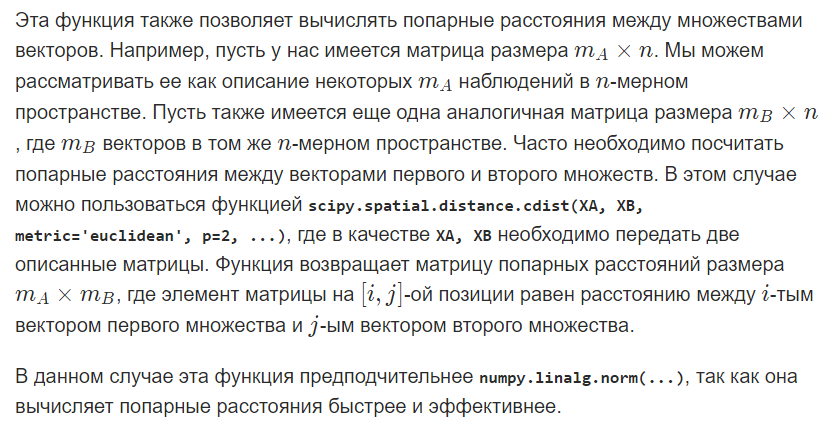

## Скалярное произведение и угол между векторами

In [27]:
a = np.array([0, 5, -1])
b = np.array([-4, 9, 3])
print('Вектор a:', a)
print('Вектор b:', b)

Вектор a: [ 0  5 -1]
Вектор b: [-4  9  3]


Скалярное произведение двух векторов можно вычислять с помощью функции **numpy.dot(a, b, ...)** или метода **vec1.dot(vec2)**, где vec1 и vec2 — исходные векторы. Также эти функции подходят для матричного умножения, о котором речь пойдет в следующем уроке.

In [28]:
print('Скалярное произведение a и b (через функцию):', np.dot(a, b))

Скалярное произведение a и b (через функцию): 42


In [29]:
print('Скалярное произведение a и b (через метод):', a.dot(b))

Скалярное произведение a и b (через метод): 42


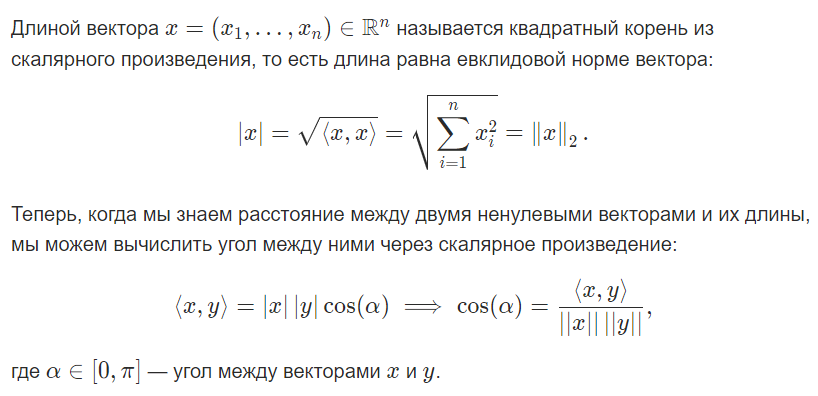

In [ ]:
cos_a = (np.dot(a, b))/(norm(a)*norm(b))
print('Косинус угла между a и b:', cos_a)
print('Сам угол (в радианах):', np.arccos(cos_a))

In [5]:
import numpy
f = numpy.arange(1, 2, 0.3, dtype=float)
print(f)


[1.  1.3 1.6 1.9]
